### Imports

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('..')
from definitions import OUTPUTS_DIR

In [2]:
sns.set_theme(style="darkgrid", palette="pastel")

### Load the results

In [3]:
def load(root : str) -> pd.DataFrame:

    datasets = os.listdir(root)

    data = []

    for dataset in datasets:

        experiments = os.listdir(os.path.join(root, dataset))

        for experiment in experiments:

            if not os.path.isdir(os.path.join(root, dataset, experiment)):
                continue

            path = os.path.join(root, dataset, experiment, 'metrics.csv')

            if not os.path.exists(path):
                continue

            df = pd.read_csv(path)
            df['experiment'] = experiment
            df['dataset'] = dataset

            data.append(df)

    return pd.concat(data)

In [4]:
results = load(OUTPUTS_DIR)
results['loss'] = results['experiment'].apply(lambda x: x.split('_')[0])
results['layer'] = results['experiment'].apply(lambda x: x.split('_')[1])
results['epoch'] = results['epoch'] + 10

In [5]:
results.head()

,filename,iou,dice,time,epoch,experiment,dataset,loss,layer
0,ISIC_0000000,0.966340,0.982882,1.198378,10,cc_gcn,isic2016,cc,gcn
1,ISIC_0000000,0.964377,0.981866,1.198378,20,cc_gcn,isic2016,cc,gcn
2,ISIC_0000000,0.952046,0.975434,1.198378,30,cc_gcn,isic2016,cc,gcn
3,ISIC_0000000,0.944870,0.971653,1.198378,40,cc_gcn,isic2016,cc,gcn
4,ISIC_0000000,0.942021,0.970145,1.198378,50,cc_gcn,isic2016,cc,gcn


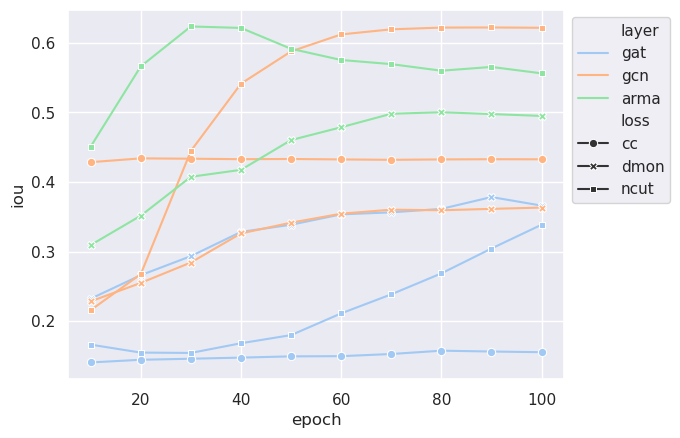

In [6]:
data = results[['epoch','iou','loss','layer','experiment']].groupby(['loss','layer','epoch','experiment']).mean().reset_index()
ax = sns.lineplot(data=data, x='epoch', y='iou', hue='layer', style='loss', markers=True, dashes=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

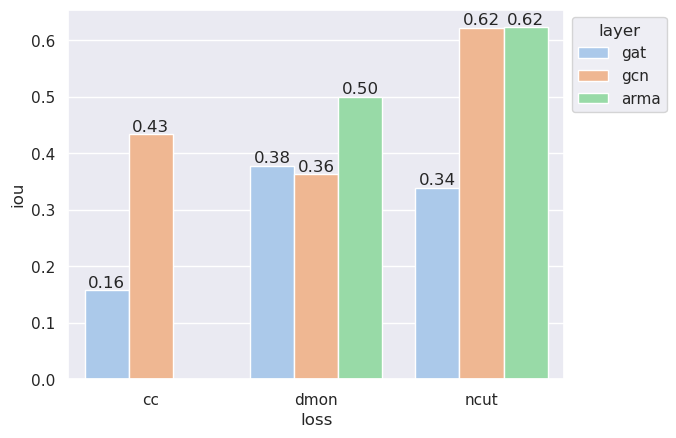

In [7]:
data = data.groupby(['loss','layer']).iou.max().reset_index()
ax = sns.barplot(data=data, x='loss', y='iou', hue='layer')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

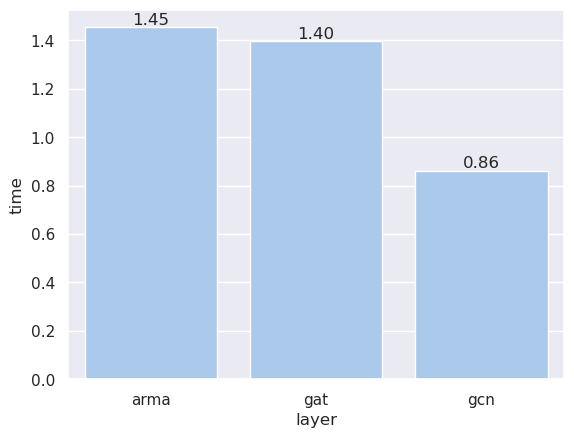

In [8]:
data = results[['time','layer']].groupby(['layer']).mean().reset_index()
ax = sns.barplot(data=data, x='layer', y='time')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')